## Fetch the Data and Visualize Data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


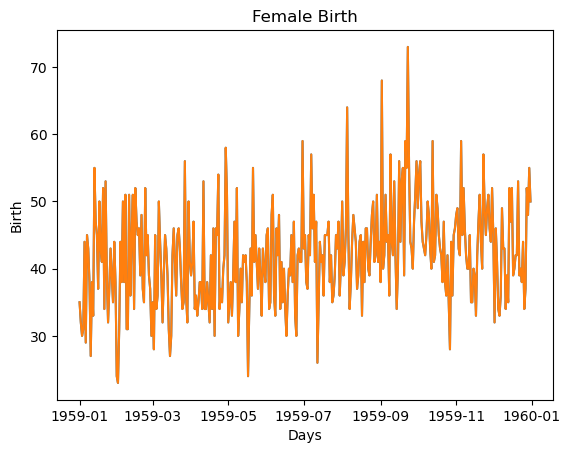

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


df = pd.read_csv("data-sets/femalebirths.csv")

df['Date'] = pd.to_datetime(df['Date'])
# Set 'Month' as the index
df.set_index('Date', inplace=True)

df['Passengers'] = df
plt.plot(df)
plt.xlabel('Days')
plt.ylabel('Birth')
plt.title('Female Birth')
plt.show()

In [2]:

# Normalized residual
#df['normalized_residual']=(df['residual'] - df['residual'].min()) / (df['residual'].max() - df['residual'].min())
#plt.plot(df['normalized_residual'])


In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

df['normalized_residual'] = df['Passengers']

# p = AR component
p = 1

for i in range(1, p+1):
    df[f'lag_{i}'] = df['normalized_residual'].shift(i)


# q = MA component
q = 1

df['rolling_mean'] = df['normalized_residual'].rolling(window=q).mean()

df.dropna(inplace=True)  # Drop rows with NaN values

df

,Births,Passengers,normalized_residual,lag_1,rolling_mean
Date,,,,,
1959-01-02,32,32,32,35.0,32.0
1959-01-03,30,30,30,32.0,30.0
1959-01-04,31,31,31,30.0,31.0
1959-01-05,44,44,44,31.0,44.0
1959-01-06,29,29,29,44.0,29.0
...,...,...,...,...,...
1959-12-27,37,37,37,34.0,37.0
1959-12-28,52,52,52,37.0,52.0
1959-12-29,48,48,48,52.0,48.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # for example

# Select features and target
X = df[['lag_1', 'rolling_mean']]
y = df['normalized_residual']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



## Bayesian Oprimization for Hyperparameter Tuning

In [5]:
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.plots import plot_objective, plot_histogram
import skopt
import numpy as np
from sklearn.svm import SVR

# Decleartions for deprecated functions in numpy
np.float = float    
np.int = int    
np.object = object    
np.bool = bool    

# Define hyperparameters for bayesian optimization
param_space = {
    'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
    'C': (1e-6, 1e+1, 'log-uniform'),
    'gamma': (1e-6, 1e+1, 'log-uniform'),
    'epsilon': (1e-6, 1e+6, 'log-uniform')
    }


kFold = KFold(n_splits=3, shuffle=True, random_state=10)

model = SVR()

bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, cv= kFold, n_jobs=-1, 
                             scoring='neg_mean_absolute_percentage_error', n_iter=5)

bayes_search.fit(X_train, y_train)

# Print the cross validation results
cv_results = bayes_search.cv_results_
cv_results_df = pd.DataFrame(cv_results)

cv_results_df['kernel'] = cv_results_df['params'].apply(lambda x: x['kernel'])
cv_results_df['C'] = cv_results_df['params'].apply(lambda x: x['C'])
cv_results_df['gamma'] = cv_results_df['params'].apply(lambda x: x['gamma'])
cv_results_df['epsilon'] = cv_results_df['params'].apply(lambda x: x['epsilon'])


print(cv_results_df[['mean_test_score', 'kernel', 'C', 'gamma', 'epsilon']])

# plot_objective creates pairwise dependence plot of the objective function.
# plot_objective(bayes_search.optimizer_results_[0],
#                    dimensions=["C", "gamma", "epsilon"],
#                    n_minimum_search=int(1e8))

# Print the best hyperparameters
print('Best hyperparameters:', bayes_search.best_params_)

best_model = bayes_search.best_estimator_

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


73


,normalized_residual
Date,
1959-10-20,42
1959-10-21,38
1959-10-22,47
1959-10-23,38
1959-10-24,36
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


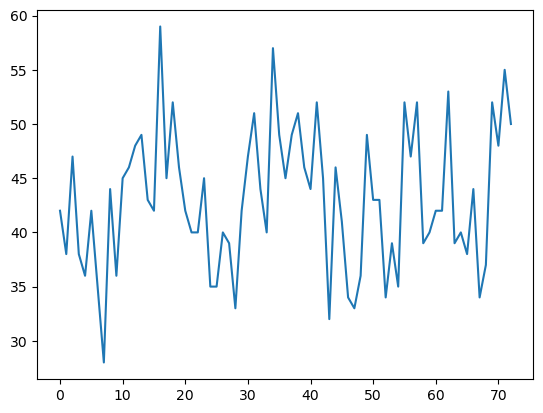

In [6]:

best_model.fit(X_train, y_train)

# Predict residuals
residuals_predicted = best_model.predict(X_test)
plt.plot(residuals_predicted)
print(len(residuals_predicted))
test_df = pd.DataFrame(y_test)
test_df

(73,)
DatetimeIndex(['1959-10-20', '1959-10-21', '1959-10-22', '1959-10-23',
               '1959-10-24', '1959-10-25', '1959-10-26', '1959-10-27',
               '1959-10-28', '1959-10-29', '1959-10-30', '1959-10-31',
               '1959-11-01', '1959-11-02', '1959-11-03', '1959-11-04',
               '1959-11-05', '1959-11-06', '1959-11-07', '1959-11-08',
               '1959-11-09', '1959-11-10', '1959-11-11', '1959-11-12',
               '1959-11-13', '1959-11-14', '1959-11-15', '1959-11-16',
               '1959-11-17', '1959-11-18', '1959-11-19', '1959-11-20',
               '1959-11-21', '1959-11-22', '1959-11-23', '1959-11-24',
               '1959-11-25', '1959-11-26', '1959-11-27', '1959-11-28',
               '1959-11-29', '1959-11-30', '1959-12-01', '1959-12-02',
               '1959-12-03', '1959-12-04', '1959-12-05', '1959-12-06',
               '1959-12-07', '1959-12-08', '1959-12-09', '1959-12-10',
               '1959-12-11', '1959-12-12', '1959-12-13', '1959-12-14',


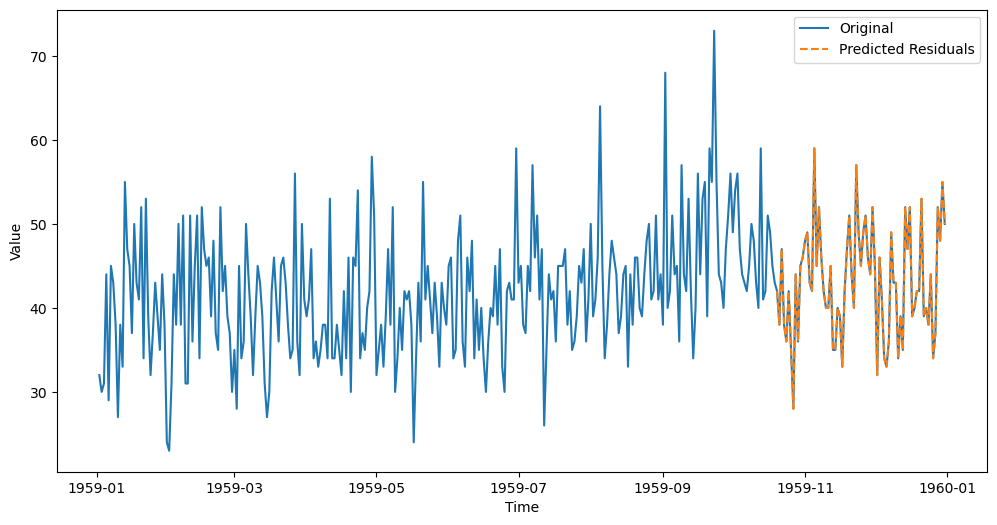

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the predicted residuals
residuals_predicted_df = pd.DataFrame(residuals_predicted, index=X_test.index, columns=['predicted_residuals'])

# Denormalize data
#residuals_predicted_df = (residuals_predicted_df - residuals_predicted_df.min()) / (residuals_predicted_df.max() - residuals_predicted_df.min())

print(residuals_predicted_df['predicted_residuals'].shape)

# Add trend and seasonality back to the perdicted residual
residuals_predicted_df['reconstructed'] =  residuals_predicted_df['predicted_residuals']


# Plot
fig, ax = plt.subplots(figsize=(12,6))

# Plot the latter part of the original time series
ax.plot(df.loc[df.index, 'Passengers'], label='Original')

# Plot the predicted residuals
ax.plot(residuals_predicted_df['reconstructed'], label='Predicted Residuals', linestyle='--')

print(residuals_predicted_df['reconstructed'].index)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import math

# Assuming 'Passengers' is your original data and 'reconstructed' is your predicted data
mse = mean_squared_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])
rmse = math.sqrt(mse)
nrmse = rmse / (df.loc[X_test.index, 'Passengers'].max() - df.loc[X_test.index, 'Passengers'].min())
r2e = r2_score(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])
mape = mean_absolute_percentage_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Normalized Root Mean Squared Error:", nrmse)
print("R Squared Error: ", r2e)
print("MAPE", mape)

Mean Squared Error:  3.6975937642994374e-06
Root Mean Squared Error:  0.001922912833255693
Normalized Root Mean Squared Error: 6.202944623405462e-05
R Squared Error:  0.9999999103820534
MAPE 4.126960453632661e-05
